In [ ]:
%reload_ext autoreload

%autoreload 2

%reload_ext dotenv
%dotenv

import gc

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from mlde_utils import dataset_split_path, workdir_path
from mlde_utils.transforms import load_transform, ComposeT, Standardize, MinMax, RecentreT, RootT, ClipT, UnitRangeT
from mlde_analysis.distribution import plot_freq_density

In [ ]:
SPLIT = "train"
DATASET_NAME = "bham64_ccpm-4x_12em_mv"
VARS = ["target_pr", "target_tmean150cm", "target_relhum150cm"]

## Best guess xfms

In [ ]:
run_names = {
    "target_pr": "score-sde/subvpsde/xarray_12em_cncsnpp_continuous/bham-4x_12em_PslS4T4V4_random-season-IstanTsqrturrecen-no-loc-spec",
    "target_tmean150cm": "score-sde/subvpsde/ukcp_local_ts_12em_cncsnpp_continuous/bham-4x_12em_PslS4T4V4_Ts",
    "target_relhum150cm": "score-sde/subvpsde/ukcp_local_rs_12em_cncsnpp_continuous/bham-4x_12em_PslS4T4V4_Rs",
}

sa_xfms = { var: load_transform(workdir_path(run_name)/"transforms/target.pickle") for var, run_name in run_names.items() }
sa_xfm = ComposeT(sa_xfms.values())

sa_ds = sa_xfm.transform(xr.open_dataset(dataset_split_path(DATASET_NAME, SPLIT))[VARS])
gc.collect()

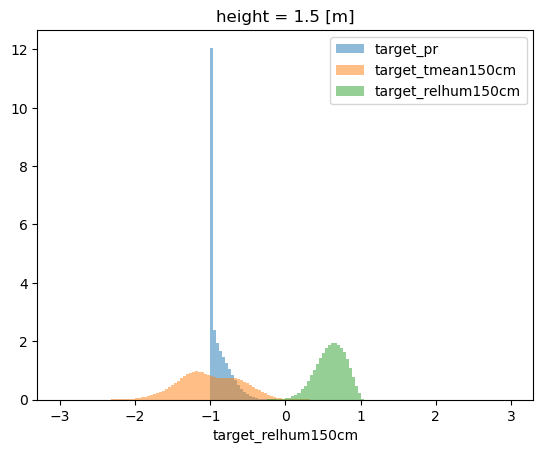

30293

In [ ]:
bins = np.histogram_bin_edges([], bins=150, range=(-3, 3))

for var in VARS:
    sa_ds[var].plot(bins=bins, alpha=0.5, label=var, density=True)
plt.legend()
plt.show()

del sa_ds
gc.collect()

In [ ]:
sa_xfms["target_tmean150cm"].transforms

[<mlde_utils.transforms.Standardize>,
 <mlde_utils.transforms.UnitRangeT>,
 <mlde_utils.transforms.RecentreT>]

## MV xfm (sqrtur)

In [ ]:
mv_run_name = "score-sde/subvpsde/ukcp_local_mv_12em_cncsnpp_continuous/bham-4x_12em_PslS4T4V4_PrRsTs"
mv_xfm = load_transform(workdir_path(mv_run_name)/"transforms/target.pickle")
mv_ds = mv_xfm.transform(xr.open_dataset(dataset_split_path(DATASET_NAME, SPLIT))[VARS])
gc.collect()

0

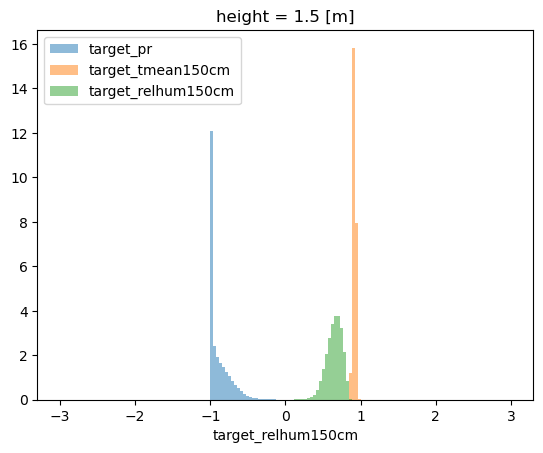

30489

In [ ]:
bins = np.histogram_bin_edges([], bins=150, range=(-3, 3))

for var in VARS:
    mv_ds[var].plot(bins=bins, alpha=0.5, label=var, density=True)
plt.legend()
plt.show()

del mv_ds
gc.collect()

## New best guess

In [ ]:
train_ds = xr.open_dataset(dataset_split_path(DATASET_NAME, "train"))[VARS]

txfm = ComposeT([
    Standardize(["target_tmean150cm"]),
    MinMax(["target_tmean150cm"]),
    RecentreT(["target_tmean150cm"]),
]).fit(train_ds)

rxfm = ComposeT([
    MinMax(["target_relhum150cm"]),
    RecentreT(["target_relhum150cm"]),
]).fit(train_ds)

prxfm = ComposeT([
    RootT(["target_pr"], 2),
    ClipT(["target_pr"]),
    UnitRangeT(["target_pr"]),
    RecentreT(["target_pr"]),
]).fit(train_ds, train_ds)

del train_ds
gc.collect()

55

In [ ]:
new_xfm = ComposeT([txfm, rxfm, prxfm])

new_ds = new_xfm.transform(xr.open_dataset(dataset_split_path(DATASET_NAME, SPLIT))[VARS])
gc.collect()

164

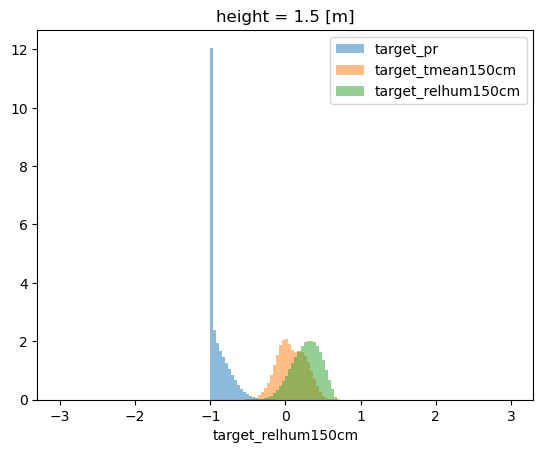

30293

In [ ]:
bins = np.histogram_bin_edges([], bins=150, range=(-3, 3))

for var in VARS:
    new_ds[var].plot(bins=bins, alpha=0.5, label=var, density=True)
plt.legend()
plt.show()

del new_ds
gc.collect()

### Check out the actual trained transforms like this

In [ ]:
run_names = {
    "target_pr": "score-sde/subvpsde/xarray_12em_cncsnpp_continuous/bham-4x_12em_PslS4T4V4_random-season-IstanTsqrturrecen-no-loc-spec",
    "target_tmean150cm": "score-sde/subvpsde/ukcp_local_ts_12em_cncsnpp_continuous/bham-4x_12em_PslS4T4V4_Ts-mm",
    "target_relhum150cm": "score-sde/subvpsde/ukcp_local_rs_12em_cncsnpp_continuous/bham-4x_12em_PslS4T4V4_Rs-mm",
}

sa_xfms = { var: load_transform(workdir_path(run_name)/"transforms/target.pickle") for var, run_name in run_names.items() }
sa_xfm = ComposeT(sa_xfms.values())

sa_ds = sa_xfm.transform(xr.open_dataset(dataset_split_path(DATASET_NAME, SPLIT))[VARS])
gc.collect()

0

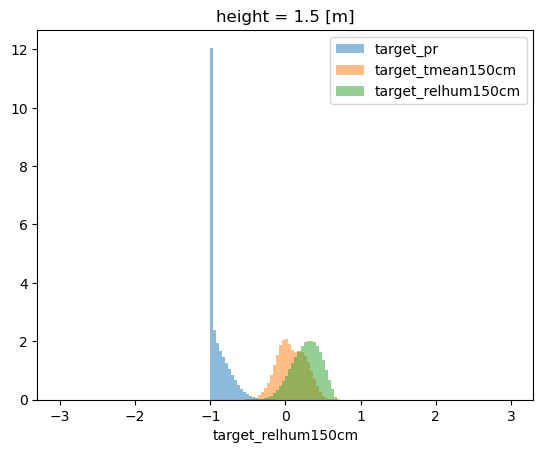

30293

In [ ]:
bins = np.histogram_bin_edges([], bins=150, range=(-3, 3))

for var in VARS:
    sa_ds[var].plot(bins=bins, alpha=0.5, label=var, density=True)
plt.legend()
plt.show()

del sa_ds
gc.collect()